In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def make_graph(ts_dict,i):

    plt.rcParams.update({
        'font.size': 14,          # Taille de base du texte
        'axes.titlesize': 16,     # Taille du titre de l’axe
        'axes.labelsize': 15,     # Taille des labels x/y
        'xtick.labelsize': 13,    # Taille des ticks de l’axe X
        'ytick.labelsize': 13,    # Taille des ticks de l’axe Y
        'legend.fontsize': 12,    # Taille de la légende
    })

    # 1️⃣ Construire un DataFrame global
    dfs = []
    for key, timestamps in ts_dict.items():
        if len(timestamps) == 0:
            continue
        df_temp = pd.DataFrame({'time': pd.to_datetime(timestamps), 'source': key})
        dfs.append(df_temp)

    if not dfs:
        print("Aucune donnée à afficher.")
    else:
        df = pd.concat(dfs)

        # 2️⃣ Grouper par tranches de 5 secondes
        df['bin'] = ((df['time'] - df['time'].min()).dt.total_seconds() // 30 * 30).astype(int)

        # 3️⃣ Compter les occurrences par 'bin' et 'source'
        counts = df.groupby(['bin', 'source']).size().unstack(fill_value=0)

        # 4️⃣ Tracer en barres empilées
        plt.figure(figsize=(12, 5))

        colors = plt.cm.get_cmap('viridis', len(counts.columns))
        # color_list = ['silver'] + [colors(i) for i in range(1, len(counts.columns))]
        color_list = [colors(i) for i in range(0, len(counts.columns))]

        bottom = np.zeros(len(counts))
        for y, col in enumerate(counts.columns):
            plt.bar(counts.index, counts[col], width=30, bottom=bottom, label=col, color=color_list[y])
            bottom += counts[col].values

        # 5️⃣ Mise en forme du graphique
        plt.xlabel("Time (30-second intervals since start)")
        plt.ylabel("Number of packets")
        # plt.title("Packet count comparison per 30-second interval")
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        # 🔧 Ajustements demandés :
        plt.margins(x=0)   # Supprime les marges verticales inutiles
        plt.tight_layout()

        print(f"saving {i}.png")
        plt.savefig(f"./output/packet_count_type/benign/{i}.png")



/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 0.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 1.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 2.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 3.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 4.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 5.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 6.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 7.png


/tmp/ipykernel_545608/545000932.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(counts.columns))


saving 8.png


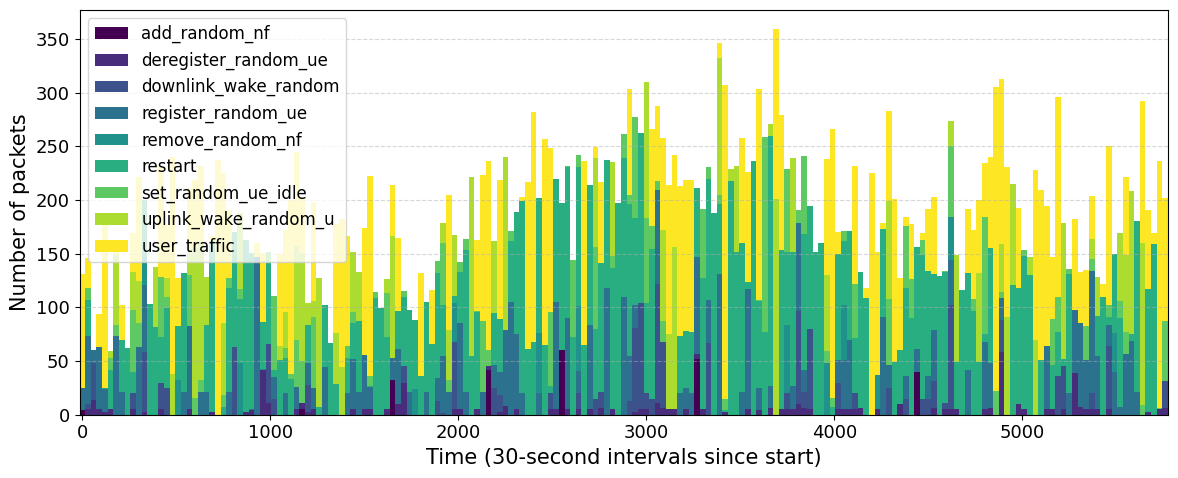

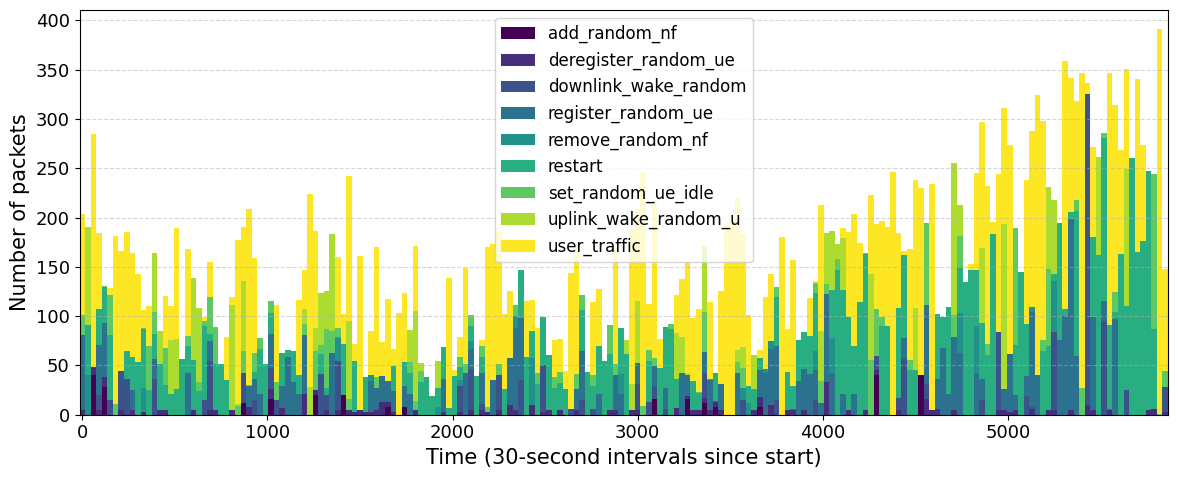

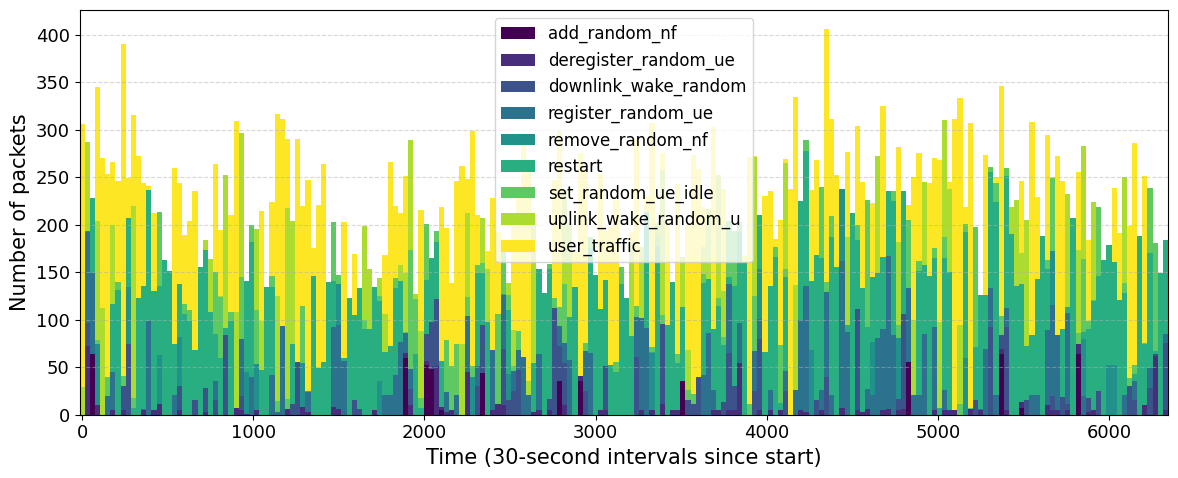

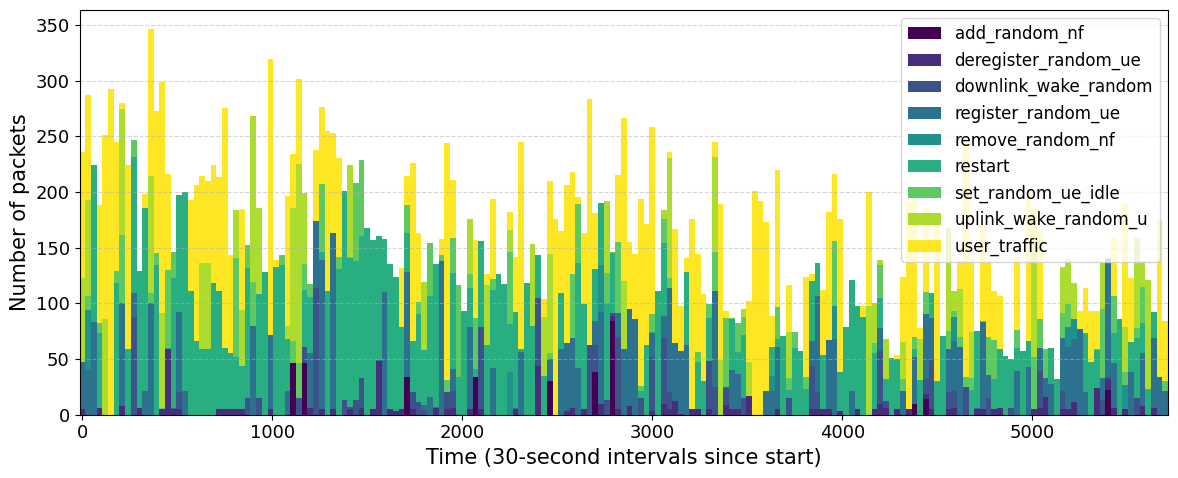

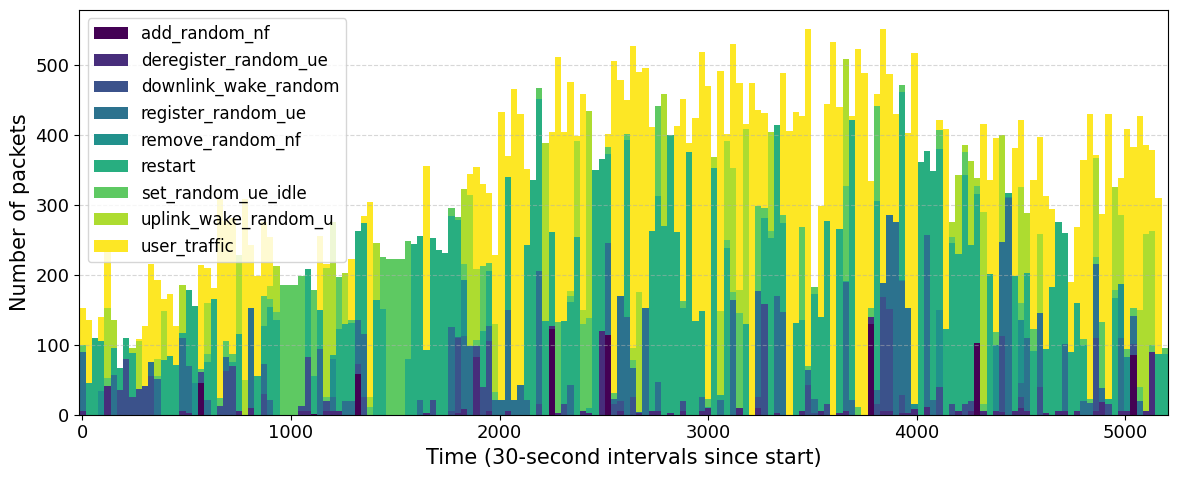

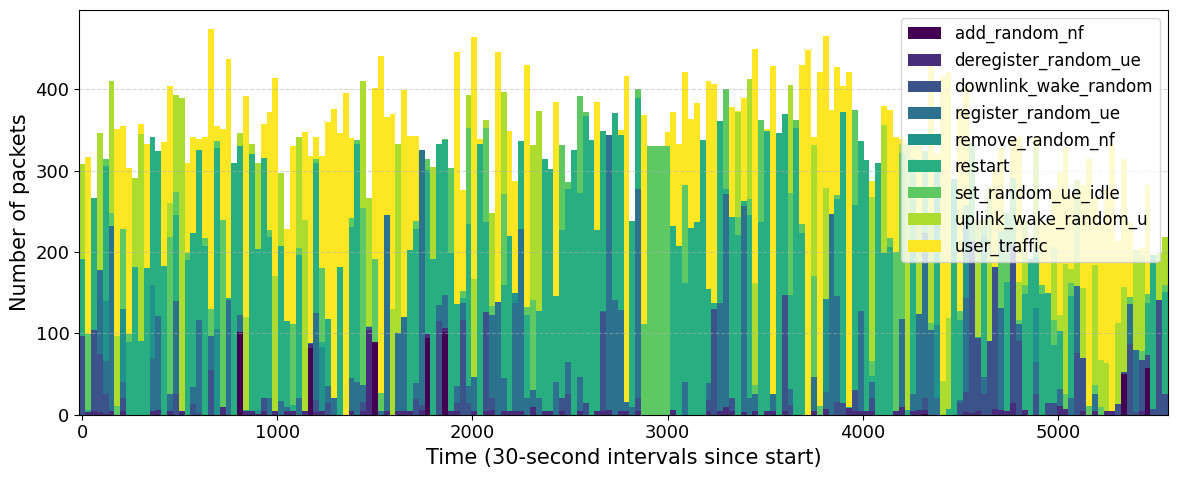

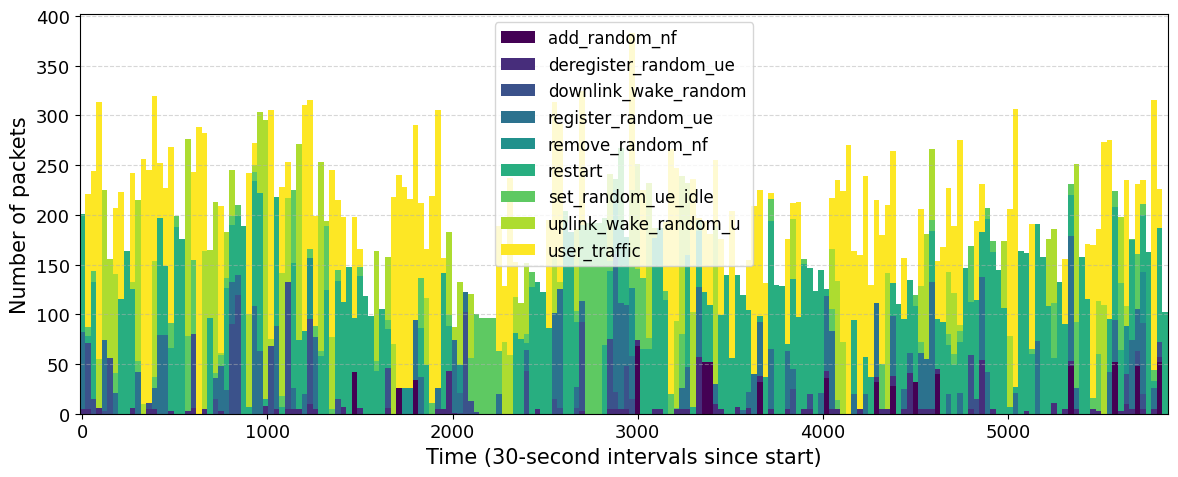

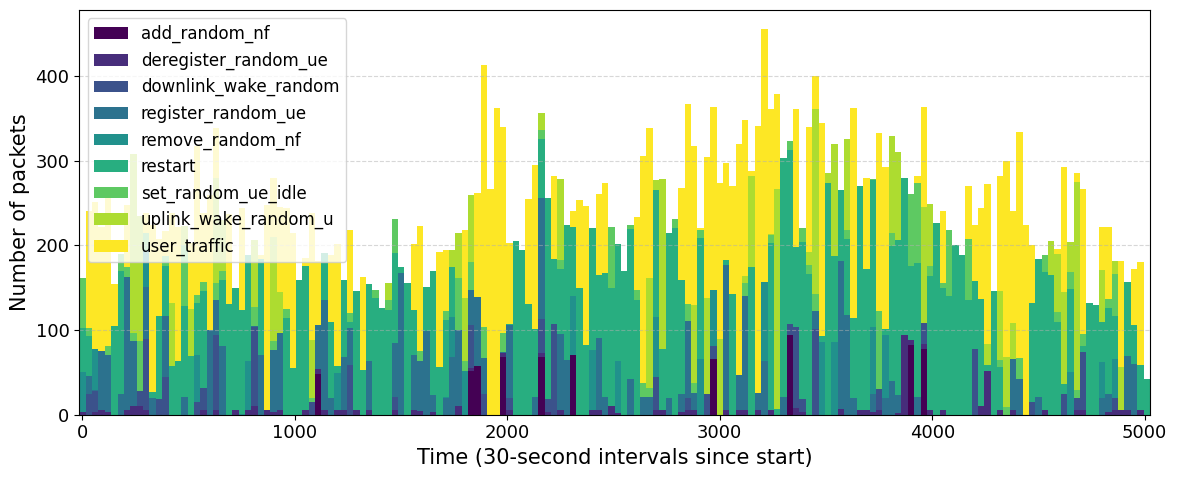

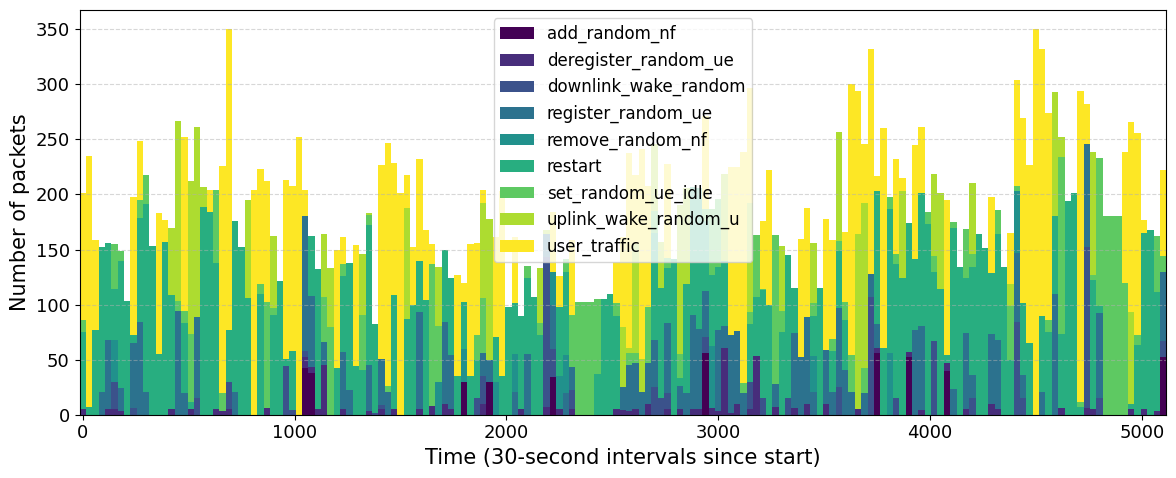

In [3]:
import json
from datetime import datetime
import glob

ATTACK = 'other_attacks'
BENIGN = 'benign'

for i,filepath in enumerate(sorted(glob.glob("../../data/pre_process/dissection_clean/*.json"))):
    with open(filepath, 'r') as f:
        my_json = json.load(f)

    total_dict = {
        BENIGN : [],
        ATTACK : [],
    }

    attack_list = set()

    for dissected_pkt in my_json:

        is_attack = int(dissected_pkt["common"].pop("is_attack"))
        attack_type = dissected_pkt["common"]["type"]
        attack_list.add(attack_type)

        packet_dict = dissected_pkt["common"].copy()
        for protocols in dissected_pkt["protocols"].values():
            for layer in protocols:
                packet_dict.update(layer)

        label = BENIGN if not is_attack else ATTACK

        total_dict[label].append(packet_dict)


    ts_dict = {
        BENIGN : [],
        ATTACK : [],
        'applicative_scan' : [],
        'cn_mitm' : [],
        'flood_deletion' : [],
        'flood_etablishment' : [],
        'fuzz' : [],
        'seid_fuzzing' : [],
        'remove_random_nf': [],
        'set_random_ue_idle': [],
        'add_random_nf': [],
        'deregister_random_ue': [],
        'restart': [],
        'uplink_wake_random_u': [],
        'user_traffic': [],
        'register_random_ue': [],
        'downlink_wake_random': []
    }

    for label in [BENIGN]:
        for packet in total_dict[label]:
            attack_type = packet.pop("type")

            ts = packet["ts"]
            ts = datetime.fromtimestamp(ts)

            if attack_type in ts_dict.keys():
                ts_dict[attack_type].append(ts)

            else :
                ts_dict[label].append(ts)

    make_graph(ts_dict,i)

    # ts_dict["Benign"] = ts_dict.pop("benign")
    # ts_dict["Scan NFs"] = ts_dict.pop("applicative_scan")
    # ts_dict["CN MiTM"] = ts_dict.pop("cn_mitm")
    # ts_dict["Flood Deletion"] = ts_dict.pop("flood_deletion")
    # ts_dict["Flood Establishment"] = ts_dict.pop("flood_etablishment")
    # ts_dict["Fuzzing API"]  = ts_dict.pop("fuzz")
    # ts_dict["Seid Fuzzing"] = ts_dict.pop("seid_fuzzing")
    # ts_dict["Other Attacks"] = ts_dict.pop("other_attacks")



C:\Users\thoger\AppData\Local\Temp\ipykernel_16568\3826097256.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(counts.columns))


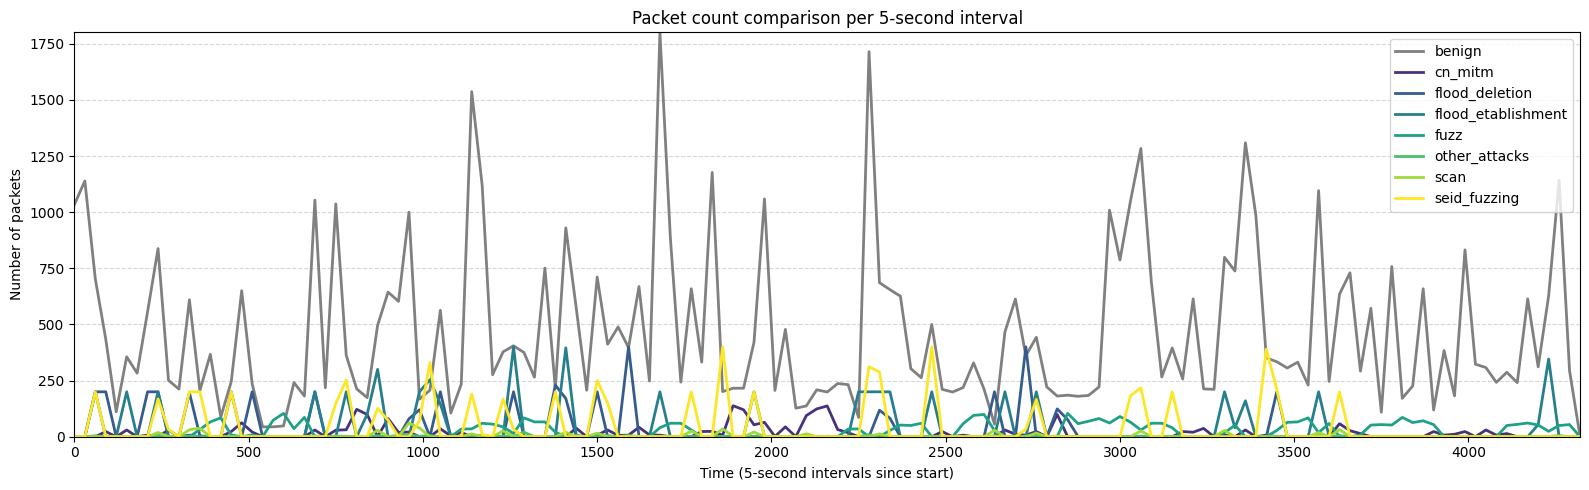

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfs = []
for key, timestamps in ts_dict.items():
    if len(timestamps) == 0:
        continue
    df_temp = pd.DataFrame({'time': pd.to_datetime(timestamps), 'source': key})
    dfs.append(df_temp)

if not dfs:
    print("Aucune donnée à afficher.")
else:
    df = pd.concat(dfs)

    # Grouper par tranches de 5 secondes
    df['bin'] = ((df['time'] - df['time'].min()).dt.total_seconds() // 30 * 30).astype(int)

    # Compter les occurrences
    counts = df.groupby(['bin', 'source']).size().unstack(fill_value=0)
    
    # if 'benign' in counts.columns:
    #     counts = counts.drop(columns='benign')

    # Générer les couleurs (première = gris)
    cmap = plt.cm.get_cmap('viridis', len(counts.columns))
    color_list = ['gray'] + [cmap(i) for i in range(1, len(counts.columns))]

    # Tracer les courbes
    plt.figure(figsize=(16, 5))
    for i, col in enumerate(counts.columns):
        plt.plot(counts.index, counts[col],
                 label=col,
                 color=color_list[i],
                 linewidth=2)

    # Mise en forme
    plt.xlabel("Time (5-second intervals since start)")
    plt.ylabel("Number of packets")
    plt.title("Packet count comparison per 5-second interval")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.margins(y=0)
    plt.margins(x=0)    # colle la base à 0
    plt.tight_layout()
    plt.show()
